### Program the basic algorithm

The DB scan algorithm is as follows:




DBSCAN(DB, dist, eps, minPts) {
   C = 0                                              /* Cluster counter */
   for each point P in database DB {
      if label(P) ≠ undefined then continue           /* Previously processed in inner loop */
      Neighbors N = RangeQuery(DB, dist, P, eps)      /* Find neighbors */
      if |N| < minPts then {                          /* Density check */
         label(P) = Noise                             /* Label as Noise */
         continue
      }
      C = C + 1                                       /* next cluster label */
      label(P) = C                                    /* Label initial point */
      Seed set S = N \ {P}                            /* Neighbors to expand */
      for each point Q in S {                         /* Process every seed point */
         if label(Q) = Noise then label(Q) = C        /* Change Noise to border point */
         if label(Q) ≠ undefined then continue        /* Previously processed */
         label(Q) = C                                 /* Label neighbor */
         Neighbors N = RangeQuery(DB, dist, Q, eps)   /* Find neighbors */
         if |N| ≥ minPts then {                       /* Density check */
            S = S ∪ N                                 /* Add new neighbors to seed set */
         }
      }
   }
}

RangeQuery(DB, dist, Q, eps) {
   Neighbors = empty list
   for each point P in database DB {                  /* Scan all points in the database */
      if dist(Q, P) ≤ eps then {                      /* Compute distance and check epsilon */
         Neighbors = Neighbors ∪ {P}                  /* Add to result */
      }
   }
   return Neighbors
}


In [26]:
import numpy as np
import numpy.linalg



class Point:
    def __init__(self, location, ID):
        self.ID = ID
        self.location = location
        self.label = -1
    def update_label(self, c):
        self.label = c
        

def RangeQuery (DB, Q, eps):
    Neighbors = []
    for P in DB:
        #l = P.location-Q.location
        if np.linalg.norm((DB[P.ID].location-DB[Q].location)) <= eps:
            Neighbors.append(P.ID)
    return Neighbors

def DBSCAN (DB, eps, minPts):
    C = 0
    for i in np.arange(len(DB)):
        if DB[i].label != -1:     #undefined = -1, noise = 0
            continue
        N = RangeQuery(DB, i, eps)
        print(N)
        if len(N)<minPts:
            DB[i].update_label(0)
            continue
        C += 1
        DB[i].update_label(C)
        S = set(N)
        print(S)
        #print(f"s = {S} of type {type(S)}")
        S -= {i}
        print(S)
        #print(f"s = {S} of type {type(S)}")
        index = 0
        S = list(S)
        print(f"s = {S} of type {type(S)}")
        while index < S[len(S) - 1]:
            #print(type(S))
            #print(type(S[index]))
            point = S[index]
            print(f"point is {point}, S is {S}")
            if DB[point].label == 0:
                #S[index].update_label(C)
                DB[point].update_label(C)
            if DB[point].label > -1:
                index += 1
                continue
            DB[point].update_label(C)
            
            N = RangeQuery(DB, point, eps)
            if len(N) >= minPts:
                S.append(N)
            
            #S = set(S)
            index += 1
    return DB
                    
                    
                    
            
            
            


In [14]:
# def RangeQuery (DB, Q, eps):
#     Neighbors = []
#     for P in DB:
#         #l = P.location-Q.location
#         if np.linalg.norm((P.location-Q.location)) <= eps:
#             Neighbors.append(P)
#     return list(set(Neighbors))

# def DBSCAN(DB, eps, minPts):
#     for p in DB:
#         if p.label > -1:
#             continue
#         N = RangeQuery(DB, p, eps)
#         if len(N) < minPts :
            

Write a naive linear search version of the algorithm.
Time your solution, and test it on the basic distribution:

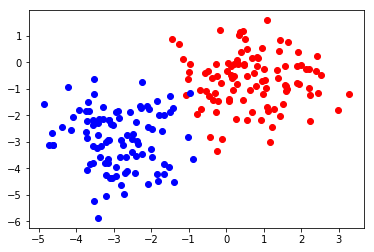

In [4]:
import numpy
import matplotlib.pyplot as pyplot
#kmeans parameters:
#number of clusters:
k=2
#variance
var = 1
#generating distributions:
#first real mean, x axis
mean1x = 0.5
#first mean, y axis
mean1y = -0.5
#same for second means
mean2x = -3
mean2y = -3
num_points = 100

a = numpy.random.multivariate_normal([mean1x, mean1y], [[var, 0], [0, var]], size=num_points)
b = numpy.random.multivariate_normal([mean2x, mean2y], [[var, 0], [0, var]], size=num_points)

pyplot.plot(a[:,0], a[:,1],'ro')
pyplot.plot(b[:,0], b[:,1],'bo')
pyplot.show()


In [27]:
DB = []
for i in np.arange(0,len(a)):
   
    DB.append(Point(a[i], i))
for i in np.arange(0,len(b)):
    
    DB.append(Point(b[i], len(a)-1+i))



In [28]:
DB2 = DBSCAN(DB, 15, 1)
# for point in DB2:
#     print(point.label)

# p = Point(a[7], 15)
# dist = RangeQuery(DB, p, 0.5)
# print(len(dist))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,

TypeError: '<' not supported between instances of 'int' and 'list'

Now, implement RangeQuery() it using R* tree. Do you see any significant runtime difference?

In [25]:
DB[1].label

1

In [67]:
b[0]

array([-3.54182838, -4.30352772])

In [69]:
np.linalg.norm(a[0] - b[1])

3.325293164970759